In [1]:
## Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## Importing utils
from utils import generate_pure_random, generate_constrained_random

## Autoreload
%load_ext autoreload
%autoreload 2

## Imporitng random package
from experiment import Random

## Silence warnings
import warnings
warnings.filterwarnings('ignore')

## Purely Random Dataset

(100, 4) (100,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 999, 1: 1})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({0: 607, 1: 393})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 521, 1: 479})
Model :  QuadraticDiscriminantAnalysis(priors=Non

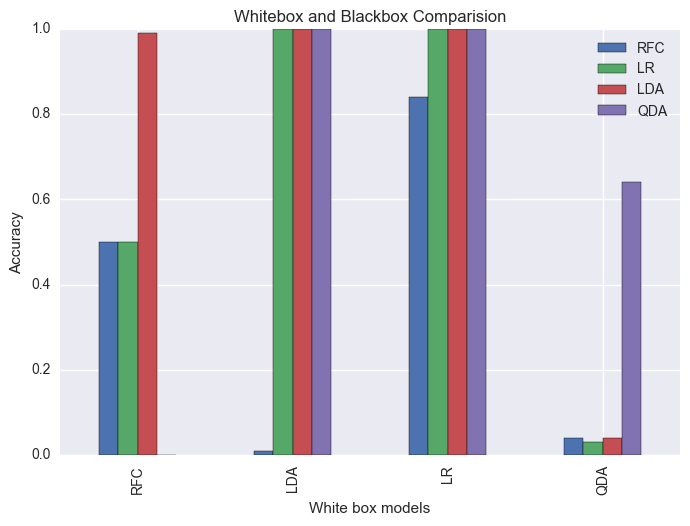

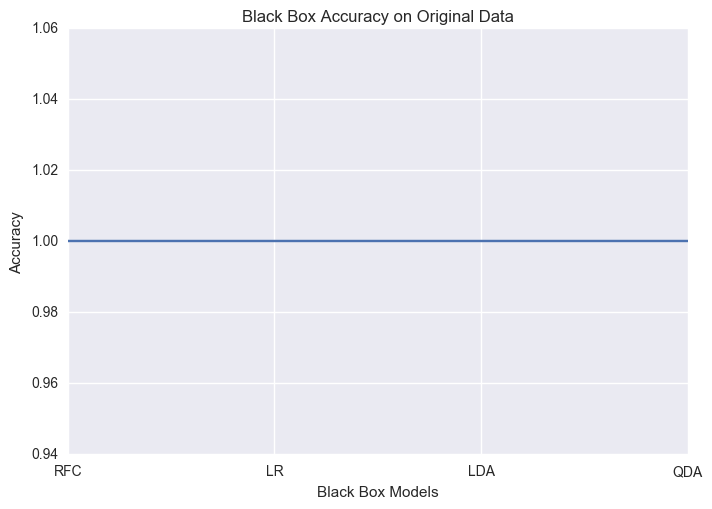

In [2]:
## Iris Dataset
data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
X = X[(y == 0) | (y == 1), :]
y = y[(y == 0) | (y == 1)]
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models

## Comparison Plot
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(100, 2) (100,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 596, 1: 404})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 582, 0: 418})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({1: 558, 0: 442})
Model :  QuadraticDiscriminantAnalysis(priors=N

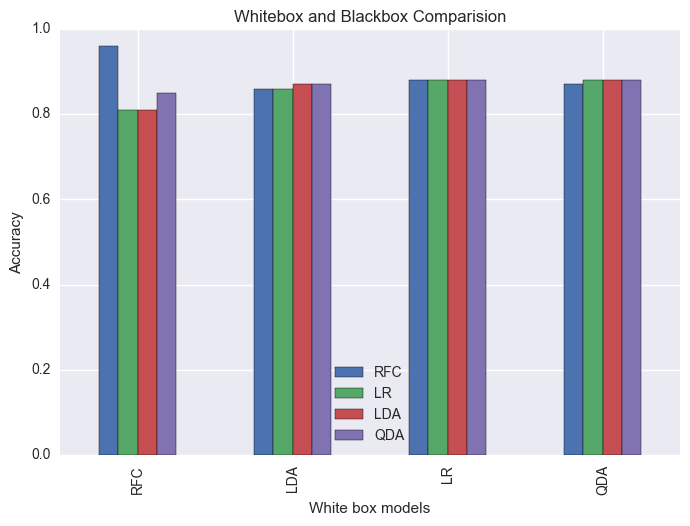

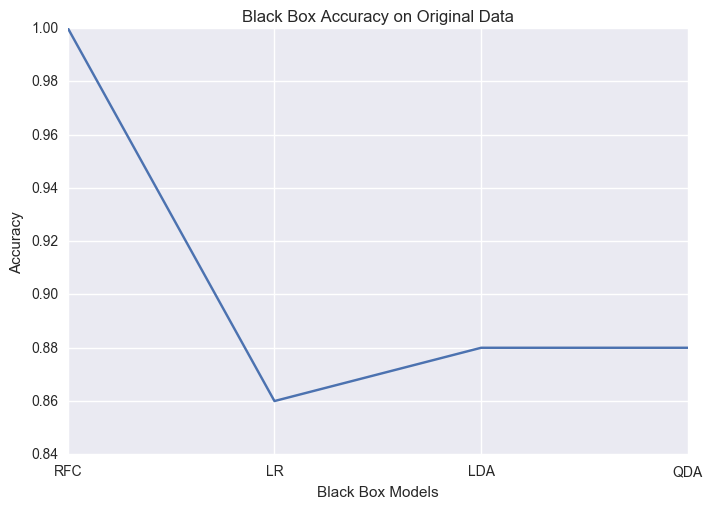

In [3]:
## Make Moons
data = datasets.make_moons()
X, y = data
feature_names = ['feature1', 'feature2']
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(569, 30) (569,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 976, 0: 24})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 540, 0: 460})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 516, 1: 484})
Model :  QuadraticDiscriminantAnalysis(priors=N

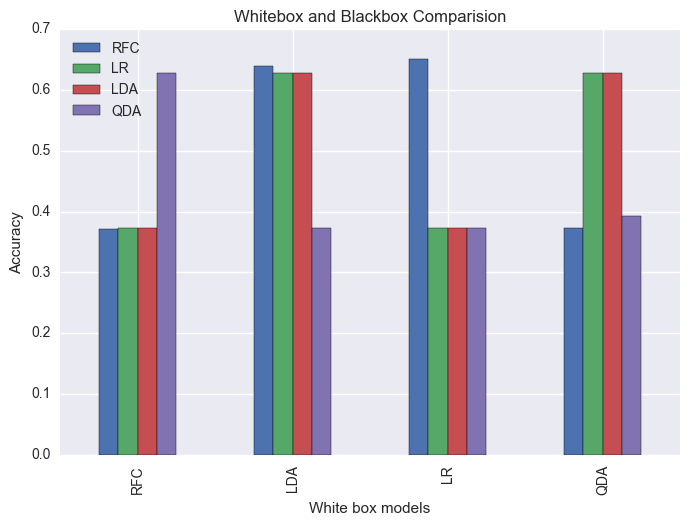

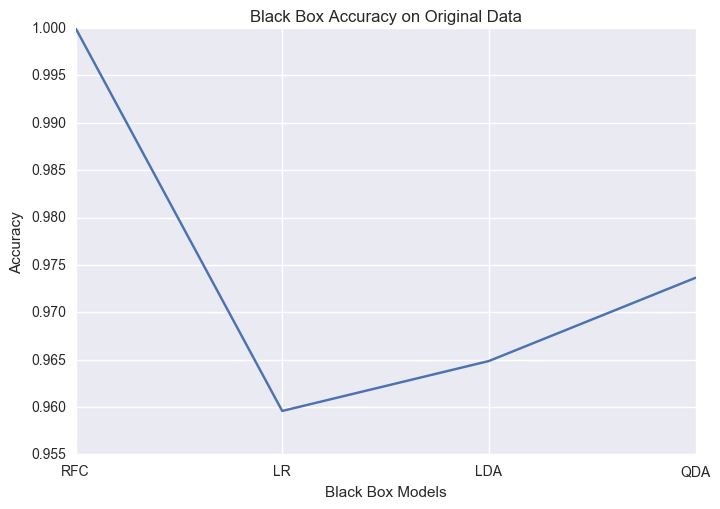

In [4]:
## Breast Cancer Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(462, 9) (462,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 1000})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({0: 1000})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 999, 1: 1})
Model :  QuadraticDiscriminantAnalysis(priors=None, reg_param=0

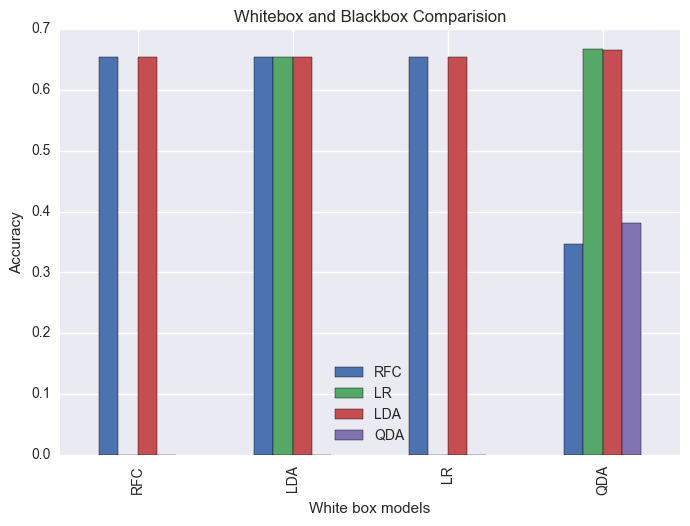

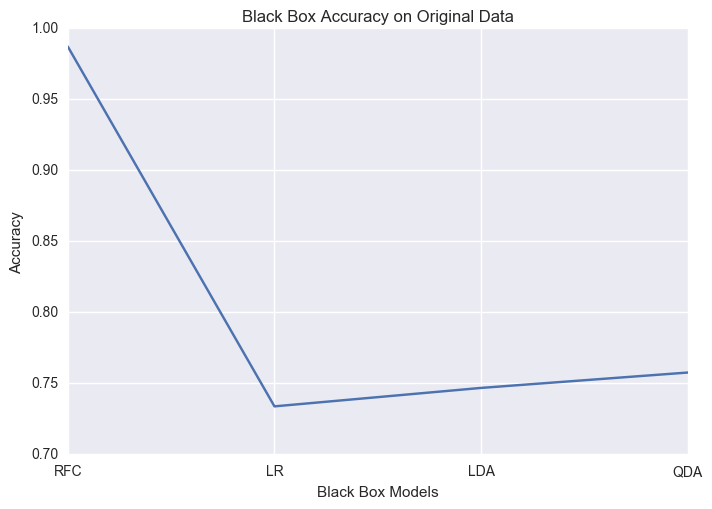

In [5]:
## Iris Dataset
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
feature_names = data.columns
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_pure_random, 1000, data_needed=False)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

## Random Data with Constraints

(100, 4) (100,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 640, 0: 360})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 580, 0: 420})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({1: 561, 0: 439})
Model :  QuadraticDiscriminantAnalysis(priors=N

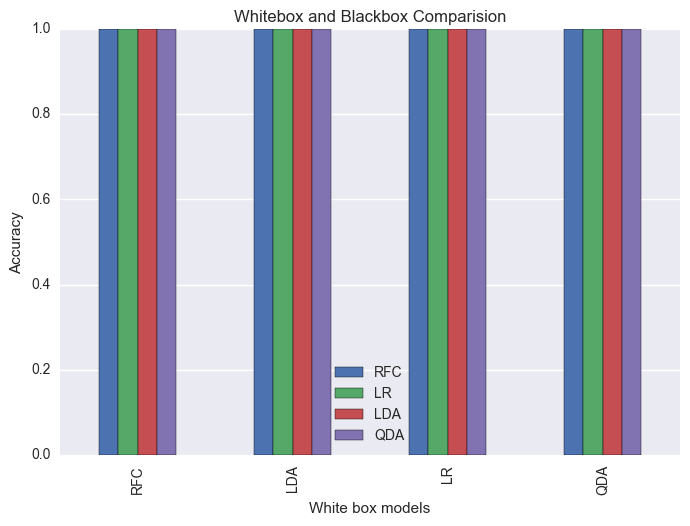

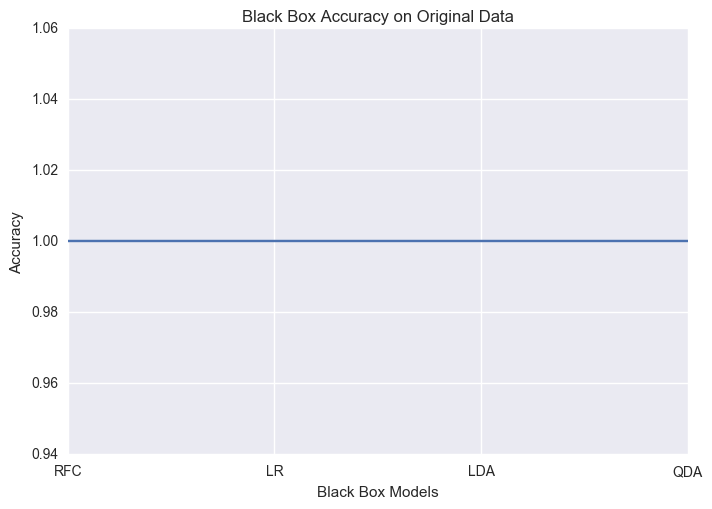

In [6]:
## Iris Dataset
data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
X = X[(y == 0) | (y == 1), :]
y = y[(y == 0) | (y == 1)]
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(100, 2) (100,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 605, 0: 395})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 506, 0: 494})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({1: 506, 0: 494})
Model :  QuadraticDiscriminantAnalysis(priors=N

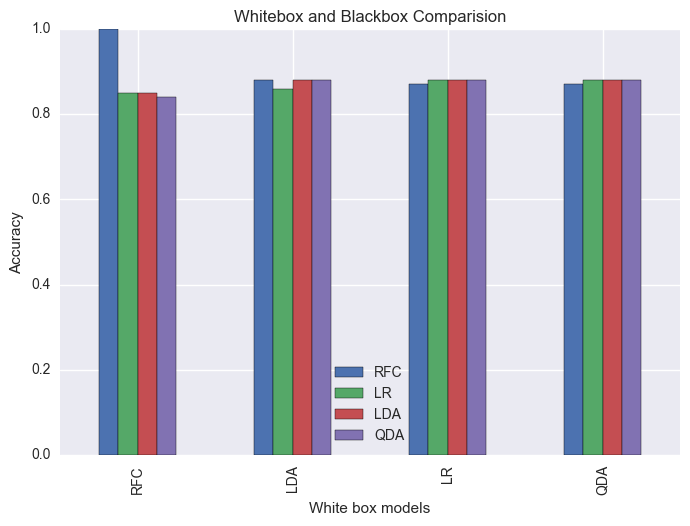

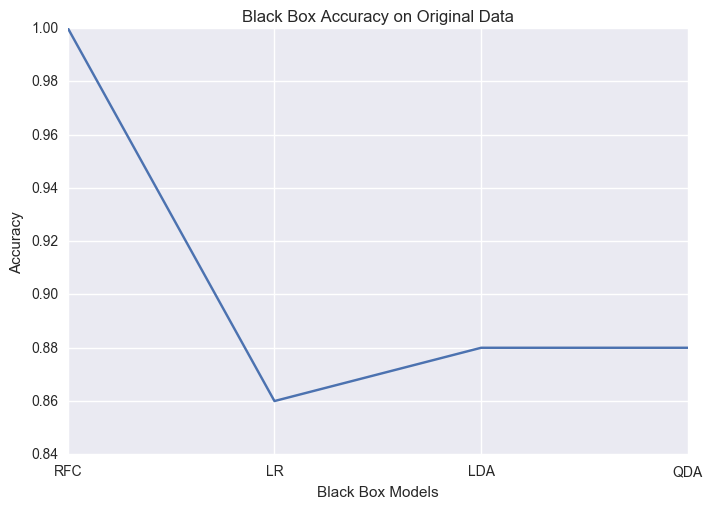

In [7]:
## Make Moons
data = datasets.make_moons()
X, y = data
feature_names = ['feature1', 'feature2']
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(569, 30) (569,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 898, 1: 102})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 518, 0: 482})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 907, 1: 93})
Model :  QuadraticDiscriminantAnalysis(priors=N

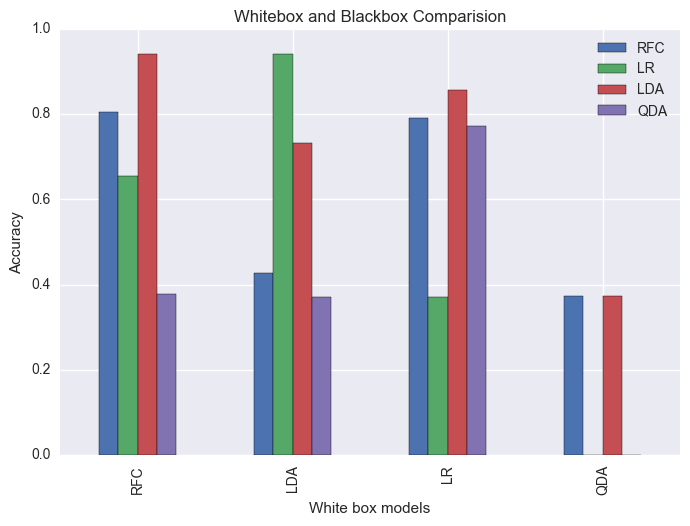

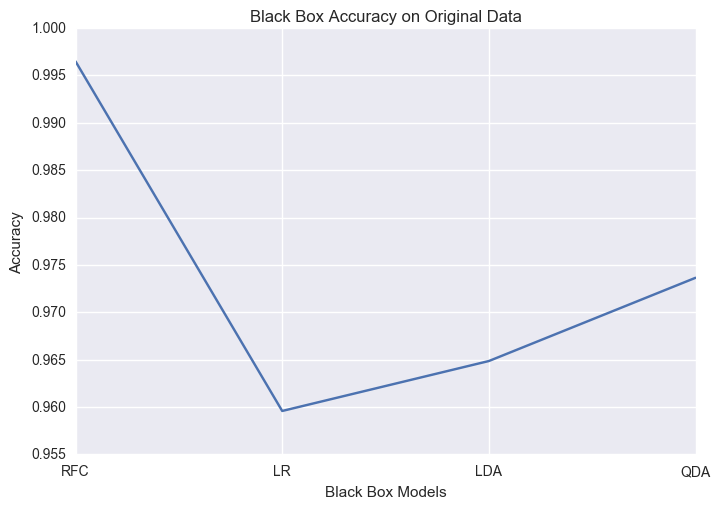

In [8]:
## Breast Cancer Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(462, 9) (462,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 684, 1: 316})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 594, 0: 406})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 525, 1: 475})
Model :  QuadraticDiscriminantAnalysis(priors=N

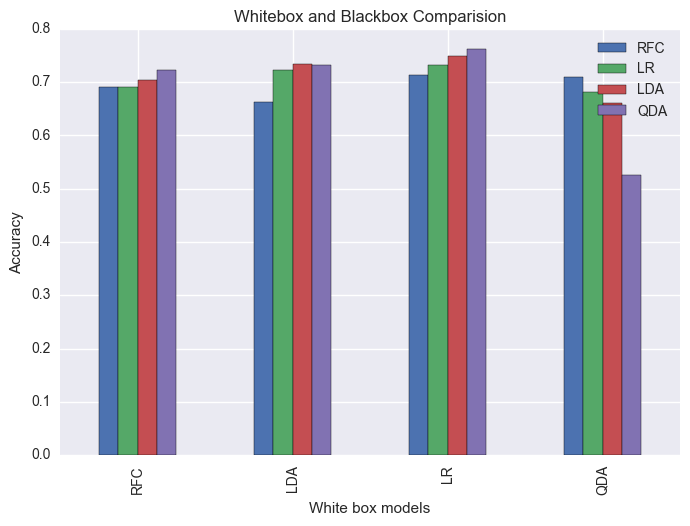

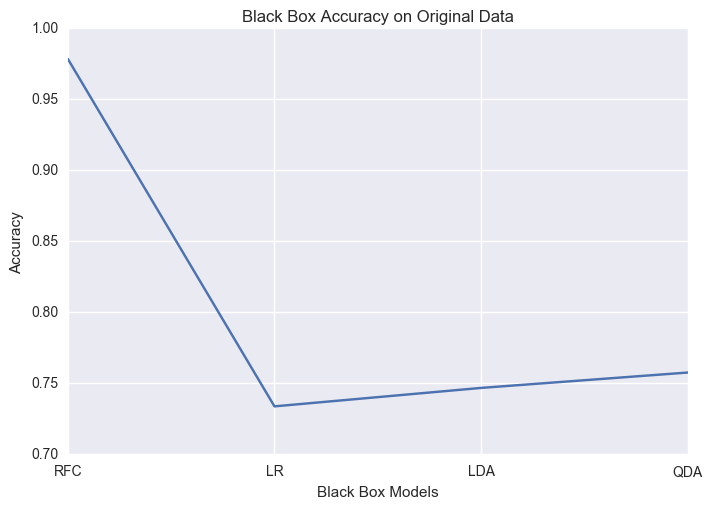

In [9]:
## Heart Dataset
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
feature_names = data.columns
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

## Multivariate Gaussian Distribution

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
## Fit the blackbox on the original data
blackbox = LogisticRegression()
blackbox.fit(X, y)
print blackbox.score(X, y)

0.733766233766


In [12]:
## Generate a noise vector for the mean
mean = np.random.normal(size=[9])
print mean.shape

## Generate a noise matrix for covariance matrix
cov = np.random.normal(size=[9,9])
print cov.shape

## Generate multivariate normal distribution using random mean and covariance matrix generated above
X_random = np.random.multivariate_normal(mean,cov,[1000])
print X_random.shape

## Check distribution of labels from data generated above
print Counter(blackbox.predict(X_random))

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
data = X_random
gmm = GaussianMixture(n_components=2)
for i in range(1, 10+1):
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    data = new_data

(9,)
(9, 9)
(1000, 9)
Counter({0: 994, 1: 6})
Distribution after  1  iteration:  Counter({0: 1963, 1: 37})
Distribution after  2  iteration:  Counter({0: 1971, 1: 29})
Distribution after  3  iteration:  Counter({0: 1967, 1: 33})
Distribution after  4  iteration:  Counter({0: 1969, 1: 31})
Distribution after  5  iteration:  Counter({0: 1983, 1: 17})
Distribution after  6  iteration:  Counter({0: 1976, 1: 24})
Distribution after  7  iteration:  Counter({0: 1982, 1: 18})
Distribution after  8  iteration:  Counter({0: 1973, 1: 27})
Distribution after  9  iteration:  Counter({0: 1973, 1: 27})
Distribution after  10  iteration:  Counter({0: 1967, 1: 33})


The distribution does not seem to change after fitting the generated data through multiple iterations of the Gaussian Mixture Model.

In [13]:
## Using 2 distributions for each of the labels
## Generate multivariate normal distribution for two labels
random_1 = np.random.multivariate_normal(np.random.normal(size=[9]), np.random.normal(size=[9,9]), [1000])
random_2 = np.random.multivariate_normal(np.random.normal(size=[9]), np.random.normal(size=[9,9]), [1000])
print random_1.shape
print random_2.shape

## Check distribution of labels from data generated above
print 'First distribution: ', Counter(blackbox.predict(random_1))
print 'Second Distribution: ', Counter(blackbox.predict(random_2))

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
data = np.vstack((random_1, random_2))
gmm = GaussianMixture(n_components=2)
for i in range(1, 10+1):
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    data = new_data

(1000, 9)
(1000, 9)
First distribution:  Counter({0: 956, 1: 44})
Second Distribution:  Counter({0: 999, 1: 1})
Distribution after  1  iteration:  Counter({0: 1955, 1: 45})
Distribution after  2  iteration:  Counter({0: 1960, 1: 40})
Distribution after  3  iteration:  Counter({0: 1967, 1: 33})
Distribution after  4  iteration:  Counter({0: 1973, 1: 27})
Distribution after  5  iteration:  Counter({0: 1962, 1: 38})
Distribution after  6  iteration:  Counter({0: 1973, 1: 27})
Distribution after  7  iteration:  Counter({0: 1979, 1: 21})
Distribution after  8  iteration:  Counter({0: 1970, 1: 30})
Distribution after  9  iteration:  Counter({0: 1974, 1: 26})
Distribution after  10  iteration:  Counter({0: 1972, 1: 28})


In [14]:
## Using 2 distributions for each of the labels derived from the predictions of the black box

## Generating mean and covariance matrix through random noise
mean = np.random.normal(size=[9])
cov = np.random.normal(size=[9,9])

## Generate multivariate normal distribution using random mean and covariance matrix generated above
X_random = np.random.multivariate_normal(mean,cov,[1000])
y_predict = blackbox.predict(X_random)

## Generate multivariate normal for first label
data = X_random[y_predict == 0, :]
mean_1, cov_1 = np.mean(data, 0), np.cov(data, rowvar=False)
random_1 = np.random.multivariate_normal(mean_1, cov_1, [1000])

## Generate multivariate normal for second label
data = X_random[y_predict == 1, :]
mean_2, cov_2 = np.mean(data, 0), np.cov(data, rowvar=False)
random_2 = np.random.multivariate_normal(mean_2, cov_2, [1000])

## Check distribution of labels from data generated above
print 'First distribution: ', Counter(blackbox.predict(random_1))
print 'Second Distribution: ', Counter(blackbox.predict(random_2))

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
data = np.vstack((random_1, random_2))
gmm = GaussianMixture(n_components=2)
for i in range(1, 10+1):
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    data = new_data

First distribution:  Counter({0: 973, 1: 27})
Second Distribution:  Counter({1: 834, 0: 166})
Distribution after  1  iteration:  Counter({0: 1158, 1: 842})
Distribution after  2  iteration:  Counter({0: 1093, 1: 907})
Distribution after  3  iteration:  Counter({0: 1141, 1: 859})
Distribution after  4  iteration:  Counter({0: 1207, 1: 793})
Distribution after  5  iteration:  Counter({0: 1204, 1: 796})
Distribution after  6  iteration:  Counter({0: 1214, 1: 786})
Distribution after  7  iteration:  Counter({0: 1216, 1: 784})
Distribution after  8  iteration:  Counter({0: 1212, 1: 788})
Distribution after  9  iteration:  Counter({0: 1197, 1: 803})
Distribution after  10  iteration:  Counter({0: 1219, 1: 781})


In [15]:
## Just like above but with a little fab!

mean = np.random.normal(size=[9])
cov = np.random.normal(size=[9,9])

## Generate multivariate normal distribution using random mean and covariance matrix generated above
X_random = np.random.multivariate_normal(mean,cov,[1000])
y_predict = blackbox.predict(X_random)

## Fit a GMM with 2 components and generate samples
## Repeat this procedure until the labels are equipartitioned
gmm = GaussianMixture(n_components=2)


for i in range(1, 10+1):
    
    ## Generate multivariate normal for first label
    data = X_random[y_predict == 0, :]
    mean_1, cov_1 = np.mean(data, 0), np.cov(data, rowvar=False)
    random_1 = np.random.multivariate_normal(mean_1, cov_1, [1000])

    ## Generate multivariate normal for second label
    data = X_random[y_predict == 1, :]
    mean_2, cov_2 = np.mean(data, 0), np.cov(data, rowvar=False)
    random_2 = np.random.multivariate_normal(mean_2, cov_2, [1000])
    
    ## Fit the GMM using the multivariate distributions for both labels
    data = np.vstack((random_1, random_2))
    gmm.fit(data)
    new_data,_ = gmm.sample(n_samples=2000)
    print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))
    
    X_random = new_data
    y_predict = blackbox.predict(X_random)

Distribution after  1  iteration:  Counter({0: 1149, 1: 851})
Distribution after  2  iteration:  Counter({1: 1004, 0: 996})
Distribution after  3  iteration:  Counter({0: 1046, 1: 954})
Distribution after  4  iteration:  Counter({0: 1007, 1: 993})
Distribution after  5  iteration:  Counter({1: 1028, 0: 972})
Distribution after  6  iteration:  Counter({0: 1024, 1: 976})
Distribution after  7  iteration:  Counter({1: 1010, 0: 990})
Distribution after  8  iteration:  Counter({1: 1035, 0: 965})
Distribution after  9  iteration:  Counter({1: 1032, 0: 968})
Distribution after  10  iteration:  Counter({0: 1020, 1: 980})


This algorithm kinda works but still need to observe how much close the mean of this randomly generated data are to the original data

In [24]:
print np.mean(X_random), np.mean(X)
print np.std(X_random), np.std(X)

0.257398208875 34.6148388648
2.02235451684 42.2743469741


In [16]:
print X_random.shape
print y_predict.shape

(2000, 9)


In [23]:
whitebox = LogisticRegression()
whitebox.fit(X_random, y_predict)
print whitebox.score(X, y)

0.65367965368


In [34]:
## Testing on some other models
def equiRandom(blackbox, num_features, data_size=1000):
    mean = np.random.normal(size=[num_features])
    cov = np.random.normal(size=[num_features,num_features])

    ## Generate multivariate normal distribution using random mean and covariance matrix generated above
    X_random = np.random.multivariate_normal(mean,cov,[data_size])
    y_predict = blackbox.predict(X_random)

    ## Fit a GMM with 2 components and generate samples
    ## Repeat this procedure until the labels are equipartitioned
    gmm = GaussianMixture(n_components=2)


    for i in range(1, 10+1):
    
        ## Generate multivariate normal for first label
        data = X_random[y_predict == 0, :]
        mean_1, cov_1 = np.mean(data, 0), np.cov(data, rowvar=False)
        random_1 = np.random.multivariate_normal(mean_1, cov_1, [data_size/2])

        ## Generate multivariate normal for second label
        data = X_random[y_predict == 1, :]
        mean_2, cov_2 = np.mean(data, 0), np.cov(data, rowvar=False)
        random_2 = np.random.multivariate_normal(mean_2, cov_2, [data_size/2])

        ## Fit the GMM using the multivariate distributions for both labels
        data = np.vstack((random_1, random_2))
        gmm.fit(data)
        new_data,_ = gmm.sample(n_samples=2000)
        print 'Distribution after ', i, ' iteration: ', Counter(blackbox.predict(new_data))

        X_random = new_data
        y_predict = blackbox.predict(X_random)
    
    return X_random, y_predict

In [37]:
## Breast Cancer Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape

blackbox = LogisticRegression()
blackbox.fit(X, y)
print 'blackbox score: ', blackbox.score(X, y)
X_random, y_random = equiRandom(blackbox, num_features=X.shape[1])

whitebox = LogisticRegression()
whitebox.fit(X_random, y_random)
print whitebox.score(X, y)

(569, 30) (569,)
blackbox score:  0.959578207381
Distribution after  1  iteration:  Counter({1: 1003, 0: 997})
Distribution after  2  iteration:  Counter({1: 1014, 0: 986})
Distribution after  3  iteration:  Counter({1: 1018, 0: 982})
Distribution after  4  iteration:  Counter({0: 1060, 1: 940})
Distribution after  5  iteration:  Counter({0: 1041, 1: 959})
Distribution after  6  iteration:  Counter({1: 1006, 0: 994})
Distribution after  7  iteration:  Counter({0: 1018, 1: 982})
Distribution after  8  iteration:  Counter({0: 1023, 1: 977})
Distribution after  9  iteration:  Counter({1: 1001, 0: 999})
Distribution after  10  iteration:  Counter({1: 1026, 0: 974})
0.627416520211


In [45]:
## Heart Dataset
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
feature_names = data.columns
print X.shape, y.shape

blackbox = LogisticRegression()
blackbox.fit(X, y)
print 'blackbox score: ', blackbox.score(X, y)
X_random, y_random = equiRandom(blackbox, num_features=X.shape[1])

whitebox = LogisticRegression()
whitebox.fit(X_random, y_random)
print whitebox.score(X, y)

(462, 9) (462,)
blackbox score:  0.733766233766
Distribution after  1  iteration:  Counter({0: 1117, 1: 883})
Distribution after  2  iteration:  Counter({0: 1033, 1: 967})
Distribution after  3  iteration:  Counter({1: 1030, 0: 970})
Distribution after  4  iteration:  Counter({1: 1020, 0: 980})
Distribution after  5  iteration:  Counter({0: 1010, 1: 990})
Distribution after  6  iteration:  Counter({1: 1039, 0: 961})
Distribution after  7  iteration:  Counter({1: 1018, 0: 982})
Distribution after  8  iteration:  Counter({0: 1017, 1: 983})
Distribution after  9  iteration:  Counter({0: 1032, 1: 968})
Distribution after  10  iteration:  Counter({0: 1028, 1: 972})
0.65367965368
